In [7]:
import numpy as np
import matplotlib.pyplot as plt
l =[]
s =[]

for x in np.linspace(0,1,10):
    for t in np.linspace(0,1,10):
        print(x)
        print(t) 

0.0
0.0
0.0
0.1111111111111111
0.0
0.2222222222222222
0.0
0.3333333333333333
0.0
0.4444444444444444
0.0
0.5555555555555556
0.0
0.6666666666666666
0.0
0.7777777777777777
0.0
0.8888888888888888
0.0
1.0
0.1111111111111111
0.0
0.1111111111111111
0.1111111111111111
0.1111111111111111
0.2222222222222222
0.1111111111111111
0.3333333333333333
0.1111111111111111
0.4444444444444444
0.1111111111111111
0.5555555555555556
0.1111111111111111
0.6666666666666666
0.1111111111111111
0.7777777777777777
0.1111111111111111
0.8888888888888888
0.1111111111111111
1.0
0.2222222222222222
0.0
0.2222222222222222
0.1111111111111111
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.3333333333333333
0.2222222222222222
0.4444444444444444
0.2222222222222222
0.5555555555555556
0.2222222222222222
0.6666666666666666
0.2222222222222222
0.7777777777777777
0.2222222222222222
0.8888888888888888
0.2222222222222222
1.0
0.3333333333333333
0.0
0.3333333333333333
0.1111111111111111
0.3333333333333333
0.2222222222222222
0

In [5]:
n = 2
p=int(n/2)
print(type(p))

<class 'int'>


In [16]:
t_ = np.linspace(0, 2* np.pi, 4)
print(type(len(t_)))
p1 = len(t_)/2
print(p1)
print(t_)

<class 'int'>
2.0
[0.         2.0943951  4.1887902  6.28318531]


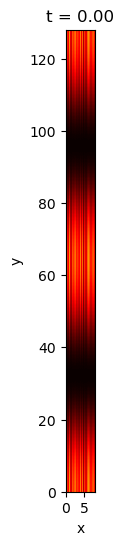

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define parameters
a = 1  # Example parameter, adjust according to your waveguide
K_0 = 2 * np.pi / (2 * 4 * a)  # Wave number (example value)
x_vals = np.linspace(0, 2 * 4 * a, 2 * 64)  # X values
t_vals = np.linspace(0, 2 * np.pi, 100)  # Time values for the animation

# Dummy data for the fields
# Replace these with actual computed values
Ez = np.random.rand(128, 128)  # Example data
Ey = np.random.rand(128, 128)  # Example data
Ex = np.random.rand(128, 128)  # Example data

# Compute intensity for different times
def compute_intensity(t):
    Ez_list = []
    Ey_list = []
    Ex_list = []
    
    for x in x_vals:
        Ez_list.append(Ez[64, :] * (np.exp(1j * K_0 * x + 1j * t) + np.exp(-1j * K_0 * x + 1j * t)))
        Ey_list.append(Ey[64, :] * (np.exp(1j * K_0 * x + 1j * t) + np.exp(-1j * K_0 * x + 1j * t)))
        Ex_list.append(Ex[64, :] * (np.exp(1j * K_0 * x + 1j * t) + np.exp(-1j * K_0 * x + 1j * t)))
    
    Ez_list = np.abs(np.array(Ez_list)) ** 2
    Ey_list = np.abs(np.array(Ey_list)) ** 2
    Ex_list = np.abs(np.array(Ex_list)) ** 2
    return Ez_list + Ey_list + Ex_list

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize plot
img = ax.imshow(compute_intensity(t_vals[0]), cmap='hot', origin='lower', extent=[0, 2 * 4 * a, 0, 2 * 64])
ax.set_title(f"t = {t_vals[0]:.2f}")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Update function for animation
def update(frame):
    t = t_vals[frame]
    intensity = compute_intensity(t)
    img.set_data(intensity)
    ax.set_title(f"t = {t:.2f}")
    return [img]

# Create animation
anim = FuncAnimation(fig, update, frames=len(t_vals), interval=100, blit=True)

# Show animation
plt.show()


Ez_array shape: (20, 1, 128)
Ez_array[0] shape: (1, 128)


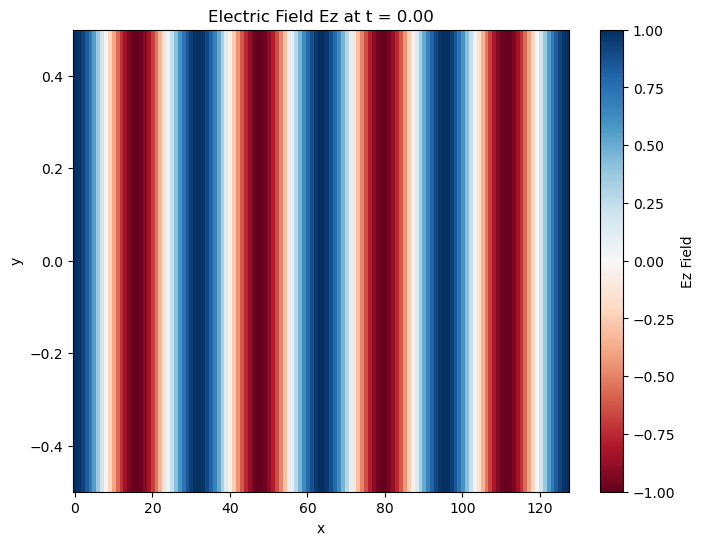

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
a = 1
K_0 = 0.5 * (2 * np.pi) / a
x_vals = np.linspace(0, 2 * 4 * a, 2 * 64)  # X values
t_vals = np.linspace(0, 2 * np.pi, 20)  # Time values

# Dummy function to simulate Ez field
def compute_Ez(x, t):
    return np.cos(K_0 * x) * np.cos(t)

# Prepare data for animation
Ez_list = []
for t in t_vals:
    Ez_list.append(compute_Ez(x_vals, t))

# Convert list to 2D array, assuming height = 1 (no y-dimension)
Ez_array = np.array(Ez_list)

# Reshape Ez_array to 2D if necessary (for example, adding a height dimension)
# In this case, let's assume it's a 2D array with only one height dimension
Ez_array = np.expand_dims(Ez_array, axis=1)  # Adding a dummy dimension if needed

# Check shapes
print("Ez_array shape:", Ez_array.shape)  # Should be (num_time_steps, height, width)
print("Ez_array[0] shape:", Ez_array[0].shape)  # Should be (height, width)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(Ez_array[0], cmap='RdBu', vmin=-1, vmax=1, origin='lower', aspect='auto')
ax.set_title('Electric Field Ez Over Time')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Add a colorbar
fig.colorbar(cax, ax=ax, label='Ez Field')

# Update function for animation
def update(frame):
    cax.set_data(Ez_array[frame])
    ax.set_title(f'Electric Field Ez at t = {t_vals[frame]:.2f}')
    return [cax]

# Create the animation
anim = FuncAnimation(fig, update, frames=len(t_vals), interval=100, blit=True)

# Show the animation
plt.show()



In [30]:
period_inx = 4*2*a
resl_inx = 2*64
period_intime = 2*np.pi*a
resl_intime =128
t_values = np.linspace(0, 2*period_intime, resl_intime)
x_values = np.linspace(0, period_inx*1, resl_inx)

print(type(x_values))

<class 'numpy.ndarray'>


In [32]:
print(x_values*t_values)
print((x_values*t_values).shape)

[0.00000000e+00 6.23293229e-03 2.49317292e-02 5.60963906e-02
 9.97269166e-02 1.55823307e-01 2.24385562e-01 3.05413682e-01
 3.98907667e-01 5.04867516e-01 6.23293229e-01 7.54184807e-01
 8.97542250e-01 1.05336556e+00 1.22165473e+00 1.40240977e+00
 1.59563067e+00 1.80131743e+00 2.01947006e+00 2.25008856e+00
 2.49317292e+00 2.74872314e+00 3.01673923e+00 3.29722118e+00
 3.59016900e+00 3.89558268e+00 4.21346223e+00 4.54380764e+00
 4.88661892e+00 5.24189606e+00 5.60963906e+00 5.98984793e+00
 6.38252267e+00 6.78766326e+00 7.20526973e+00 7.63534206e+00
 8.07788025e+00 8.53288431e+00 9.00035423e+00 9.48029001e+00
 9.97269166e+00 1.04775592e+01 1.09948926e+01 1.15246918e+01
 1.20669569e+01 1.26216879e+01 1.31888847e+01 1.37685474e+01
 1.43606760e+01 1.49652704e+01 1.55823307e+01 1.62118569e+01
 1.68538489e+01 1.75083068e+01 1.81752306e+01 1.88546202e+01
 1.95464757e+01 2.02507970e+01 2.09675842e+01 2.16968373e+01
 2.24385562e+01 2.31927411e+01 2.39593917e+01 2.47385083e+01
 2.55300907e+01 2.633413